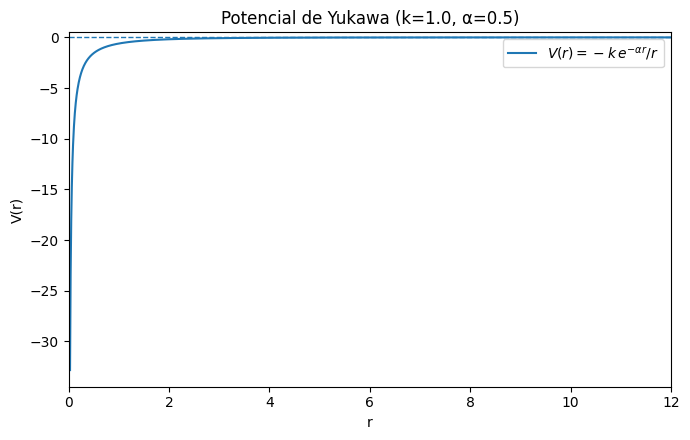

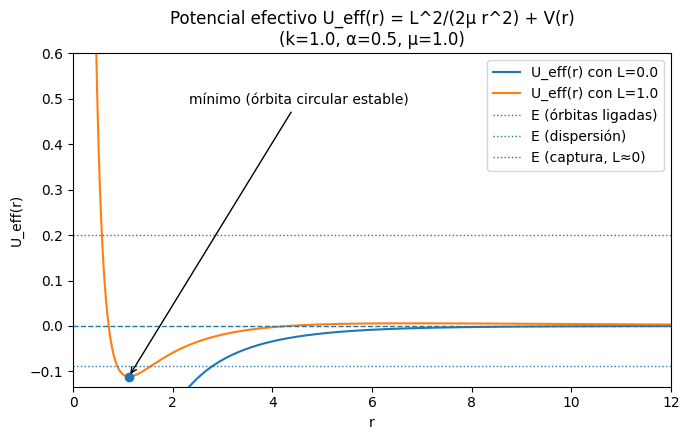

Figuras guardadas en: potencial_yukawa.png y potencial_efectivo.png
Mínimo encontrado (r_min, U_min): 1.119814907453727 -0.11141088387840176


In [1]:
# grafica_yukawa.py
# Grafica el potencial de Yukawa y el potencial efectivo para distintos L.
# Requisitos: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt

# --------------------
# Parámetros (ajusta si quieres)
k = 1.0        # constante positiva
alpha = 0.5    # constante de decaimiento > 0
mu = 1.0       # masa reducida (para el término centrífugo)
L_values = [0.0, 1.0]   # valores de momento angular a comparar
# --------------------

# Rango radial (evitar r = 0 por la singularidad 1/r)
r = np.linspace(0.03, 12.0, 2000)

# Definición del potencial de Yukawa
def V_yukawa(r, k, alpha):
    return -k * np.exp(-alpha * r) / r

# Potencial de Yukawa
V = V_yukawa(r, k, alpha)

# --- Figura 1: Potencial de Yukawa ---
plt.figure(figsize=(7,4.5))
plt.plot(r, V, label=r"$V(r) = -k\,e^{-\alpha r}/r$")
plt.axhline(0, linestyle="--", linewidth=1)
plt.title(f"Potencial de Yukawa (k={k}, α={alpha})")
plt.xlabel("r")
plt.ylabel("V(r)")
plt.xlim(0, 12)
plt.ylim(min(V[np.isfinite(V)])*1.05, 0.5)
plt.legend()
plt.tight_layout()
plt.show()

# --- Potencial efectivo ---
def U_eff(r, L, mu, k, alpha):
    return L**2/(2*mu*r**2) + V_yukawa(r, k, alpha)

plt.figure(figsize=(7,4.5))
for L in L_values:
    U = U_eff(r, L, mu, k, alpha)
    plt.plot(r, U, label=f"U_eff(r) con L={L}")
plt.axhline(0, linestyle="--", linewidth=1)

# Buscar mínimo local (aproximado en el rango)
def find_minimum(r, U):
    idx = np.nanargmin(U)
    return r[idx], U[idx]

U_L1 = U_eff(r, 1.0, mu, k, alpha)
r_min, U_min = find_minimum(r, U_L1)

# Energías de ejemplo para ilustrar regímenes
E_bound = (U_min + 0.2*(0 - U_min))  # entre U_min y 0
E_scatt = 0.2                        # > 0 (ejemplo)
E_capture = U_min - 0.5              # por debajo del mínimo (ejemplo)

# Dibujar líneas de energía guía
plt.axhline(E_bound, linestyle=":", linewidth=1, label="E (órbitas ligadas)")
plt.axhline(E_scatt, linestyle=":", linewidth=1, label="E (dispersión)")
plt.axhline(E_capture, linestyle=":", linewidth=1, label="E (captura, L≈0)")

# Marcar el mínimo (órbita circular estable)
plt.scatter([r_min], [U_min], zorder=3)
plt.annotate("mínimo (órbita circular estable)",
             xy=(r_min, U_min), xytext=(r_min+1.2, U_min+0.6),
             arrowprops=dict(arrowstyle="->"))

plt.title(f"Potencial efectivo U_eff(r) = L^2/(2μ r^2) + V(r)\n(k={k}, α={alpha}, μ={mu})")
plt.xlabel("r")
plt.ylabel("U_eff(r)")
plt.xlim(0, 12)
plt.ylim(min(U_L1[np.isfinite(U_L1)])*1.2, max(0.6, E_scatt+0.2))
plt.legend()
plt.tight_layout()
plt.show()

# Guardar las figuras
fig1_path = "potencial_yukawa.png"
fig2_path = "potencial_efectivo.png"

# Regenerar y guardar para asegurarse de que los archivos existan
plt.figure(figsize=(7,4.5))
plt.plot(r, V, label=r"$V(r) = -k\,e^{-\alpha r}/r$")
plt.axhline(0, linestyle="--", linewidth=1)
plt.title(f"Potencial de Yukawa (k={k}, α={alpha})")
plt.xlabel("r")
plt.ylabel("V(r)")
plt.xlim(0, 12)
plt.ylim(min(V[np.isfinite(V)])*1.05, 0.5)
plt.legend()
plt.tight_layout()
plt.savefig(fig1_path, dpi=180)
plt.close()

plt.figure(figsize=(7,4.5))
for L in L_values:
    U = U_eff(r, L, mu, k, alpha)
    plt.plot(r, U, label=f"U_eff(r) con L={L}")
plt.axhline(0, linestyle="--", linewidth=1)
plt.axhline(E_bound, linestyle=":", linewidth=1, label="E (órbitas ligadas)")
plt.axhline(E_scatt, linestyle=":", linewidth=1, label="E (dispersión)")
plt.axhline(E_capture, linestyle=":", linewidth=1, label="E (captura, L≈0)")
plt.scatter([r_min], [U_min], zorder=3)
plt.annotate("mínimo (órbita circular estable)",
             xy=(r_min, U_min), xytext=(r_min+1.2, U_min+0.6),
             arrowprops=dict(arrowstyle="->"))
plt.title(f"Potencial efectivo U_eff(r) = L^2/(2μ r^2) + V(r)\n(k={k}, α={alpha}, μ={mu})")
plt.xlabel("r")
plt.ylabel("U_eff(r)")
plt.xlim(0, 12)
plt.ylim(min(U_L1[np.isfinite(U_L1)])*1.2, max(0.6, E_scatt+0.2))
plt.legend()
plt.tight_layout()
plt.savefig(fig2_path, dpi=180)
plt.close()

print("Figuras guardadas en:", fig1_path, "y", fig2_path)
print("Mínimo encontrado (r_min, U_min):", r_min, U_min)
